## Mapas de color

En ocasiones tenemos que trabajar con funciones de dos variables, en donde una representación como un mapa de colores, donde cada color indica un valor de esa función, resulta útil. También por ejemplo, podemos requerir mapas de contornos para dar alturas de una superficie por ejemplo. Matplotlib tiene varias funciones para hacer este tipo de figuras.

La mayor diferencia con respecto al caso de gráficas en donde representemos la variación de una magnitud `y` frente a otra `x` es que en el caso de figuras en 3D o mapas de color representamos una matriz de datos, en donde una magnitud `z` toma un valor diferente para cada para de valores `(x,y)`. Si disponemos ya de la matriz, podemos dibujar un mapa de color directamente con la función, 

`pcolormesh(z)`

pero si queremos implementar una función que asigne un valor `z` para cada par de valores `(x,y)` primero tenemos que definir esta malla de coordenadas `(x,y)` sobre la que aplicar la función. Esto se hace con la función `meshgrid` del módulo Numpy. Veamos un ejemplo. Vamos a dibujar una función simple, que es puede ser interpretada como la función pupila para un sistema óptico, es decir, una función que valga 1 dentro de un círculo de radio igual a 1 y 0 fuera de ella.

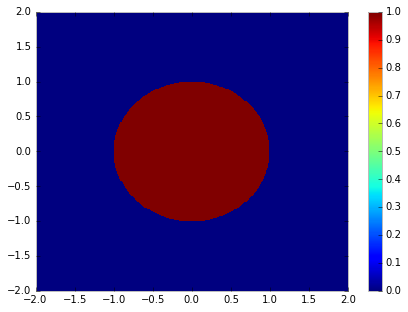

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

x = np.linspace(-2,2,301) # Creamos un vector x de 121 puntos entre -2 y 2
y = np.linspace(-2,2,301) # Creamos un vector y de 121 puntos entre -2 y 2
X,Y = np.meshgrid(x,y) #Creamos una malla de puntos para usarlos como argumentos de la función.


Pupila = (np.sqrt(X**2 + Y**2)<1) # Generamos la función pupila. Nos da 1 si se cumple la condición, 0 si no se cumple

# Visualizamos la funcion
fig = plt.figure(figsize=(7,5))
plt.pcolormesh(x,y,Pupila)
plt.colorbar()

En el anterior código tres funciones merecen especial atención:

* np.meshgrid: Esta función genera a partir de dos vectores una malla de puntos que se corresponden con las coordenadas en el plano dadas por esos vectores.

* plt.pcolormesh: Genera un mapa de color. En esta función se puede elegir qué colores usar añadiéndole el argumento cmap.

* plt.colorbar: Genera una escala indicando a qué valor de la función representada se corresponde cada color.

### Ejercicio 1

Vamos por ejemplo a dibujar diferentes funciones que se corresponden a distintas aberraciones de onda. La aberración de onda es la distancia en camino óptico entre el frente de ondas real y el ideal en cada punto de la pupila de salida del sistema. Por tanto es una función de dos variables. Una aberración de onda que sea positiva significa que el frente de ondas real se encuentra adelantado con respecto al ideal. Por ejemplo, el efecto de una aberración de onda positiva en los extremos y negativa en el centro es que el frente de ondas tenga una mayor curvatura que el ideal, y converja en un punto anterior. Para tratar la función aberración de onda es común utilizar los polinomios de Zernike a los que multiplicaremos por la función pupila obtenida anteriormente para visualizar la función aberración de onda, 

$$ W(\rho,\theta) = Z_i(\rho,\theta) P(\rho,\theta)$$

1.1 Obtén las variables `rho` y `theta` que utilizaremos como coordenadas polares, a partir de las variables `X` e `Y` definidas en el ejemplo anterior (Nota: `X` e `Y` son el resultado de aplicar meshgrid a los vectores `x` e `y`). Utilizar la función `np.arctan2` para el cálculo de `theta`, no `np.arctan`.

1.2 Vamos a visualizar dos aberraciones de onda típicas en un sistema óptico: astigmatismo y coma vertical. Busca en internet la expresión de los polinomios de Zernike para ambas aberraciones e implementalas en las variables `Wastigmatismo` y `Wcoma`. Visualiza estas aberraciones en dos subfiguras. Añade etiquetas a los ejes y muestra la escala de colores con la función `plt.colorbar` en cada subfigura.

También podemos representar una función de 2 variables mediante un mapa de contornos, cada uno de los cuales da el valor de una "altura" o valor de la función.

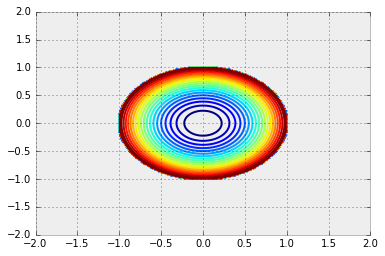

In [6]:
test = (X**2 + Y**2)*Pupila
plt.contour(X,Y,test,20) # El último número elige el número de contornos que queremos dibujar

Si queremos unir ambas representaciones, podemos usar la función `plt.contourf`

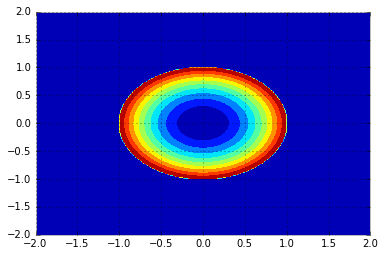

In [7]:
plt.contourf(X,Y,test,10)

### Representación en 3D

Para la representación de una función en 3 dimensiones con Matplotlib debemos crear antes unos ejes 3D, y dibujar sobre ellos con las distintas opciones que presenta este módulo de dibujo. Para ello el esquema inicial más común es el que se muestra en la siguiente celda.

(-2, 2)

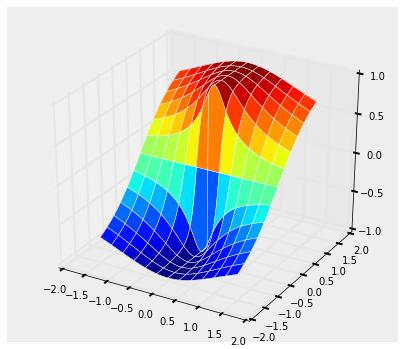

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d') # Creación de los ejes 3D

x = np.linspace(-1.5,1.5,121)
y = np.linspace(-1.5,1.5,121)
Xs,Ys = np.meshgrid(x,y)
test = np.sin(np.arctan2(Ys,Xs))
ax.plot_surface(Xs,Ys,test,cmap='jet')
plt.xlim(-2,2)
plt.ylim(-2,2)

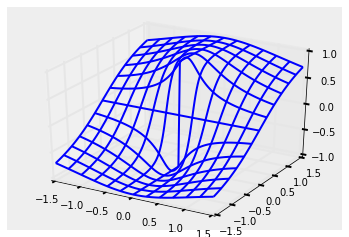

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # Creación de los ejes 3D
ax.plot_wireframe(Xs,Ys,test,rstride=10,cstride=10)

Podemos cambiar él ángulo en el que se muestran estas representaciones cambiando los valores de `elev` y `azim` asociados a los ejes 3D. El valor de `elev` representa el ángulo en grados entre la parte superior de la gráfica y el observador mientras que `azim` representa el ángulo azimutal. Por ejemplo, 

(-2, 2)

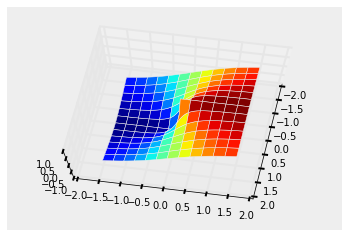

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # Creación de los ejes 3D
ax.elev = 75
ax.azim = 10
ax.plot_surface(Xs,Ys,test,cmap='jet')
plt.xlim(-2,2)
plt.ylim(-2,2)

### Ejercicio 2

2.1. Almacenar en una variable denominada `W` la aberración de onda siguiente:

$$W(\rho, \theta) = 0.5 Z_4(\rho, \theta) + 0.2 Z_5(\rho, \theta) + 0.05 Z_8(\rho, \theta)$$

Para ello, definir las variables `Z4`, `Z5` y `Z8` en donde introduciremos los polinomios de Zernike correspondientes y definimos en coordenadas polares, utilizando las variables `rho` y  `theta` definidas en el ejercicio anterior. Además, para calcular `W` multiplicaremos el resultado de la suma por la variable `Pupila` definida al comienzo de este notebook

2.2 Representar en 3 dimensiones dicha aberración de onda utilizando la función `plot_surface` de Matplotlib con una elevación de 80 y un valor del ángulo azimutal de 30$^o$

### Trabajando con imágenes.

Para trabajar con imágenes necesitamos importar módulos adicionales. El submódulo ndimage de Scipy nos proporciona las funciones más útiles para leer/escribir imágenes de ficheros, hacer filtros, segmentación, etc. Vamos a importarlo,

In [15]:
%matplotlib inline
# Esta línea anterior es necesaria para que las figuras salgan incrustadas en el notebook

import matplotlib.pyplot as plt #importa el submódulo pyplot de matplotlib como plt
import numpy as np # importamos el módulo numpy como np
import scipy.ndimage as im

Nos podemos fijar en que hemos elegido un submódulo específico dentro de todos los que tiene Scipy. Veamos ahora cómo leer una imagen de un archivo. Para ello usaremos la función `imread` del módulo cargado. Esta función, devuelve una matriz con los valores de intensidad en cada punto. Si tenemos una imagen en color, devuelve una matriz (array) por cada uno de los canales RGB en los que se descompone la imagen.

In [16]:
a = im.imread('cos40max.jpg')

Veamos el número de elementos de esta imagen

In [17]:
np.shape(a)

(210, 277)

En este caso la imagen no es una imagen a color. Si fuera así, la función `shape` nos devolvería algo como `(209,278,3)` indicando que hay 3 canales RGB. La matriz correspondiente al índice 0 en la última posición será el canal rojo, si seleccionamos como último índice el 1 obtendremos el verde, y finalmente, seleccionando el índice 2 obtendremos el canal azul.

Podemos representar esta imagen con el comando `imshow` de matplotlib

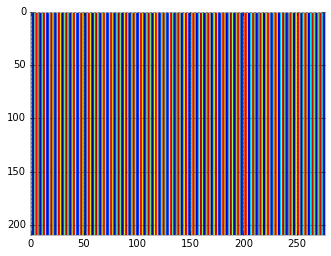

In [18]:
plt.imshow(a)

Como nuestra variable que contiene la imagen es una matriz, podríamos haber usado también alguna de las funciones vistas anteriormente, como por ejemplo, `pcolormesh`

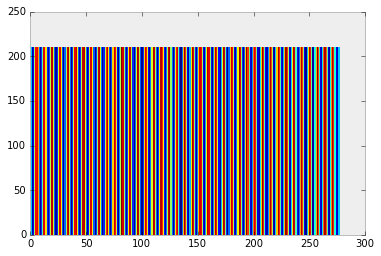

In [19]:
plt.pcolormesh(a)

Como nuestra imagen es un array de Numpy, podemos hacer todas las operaciones que hemos visto anteriormente con los vectores y matrices. En particular, por ejemplo, podemos escoger filas y/o columnas de la imagen y dibujarlas,

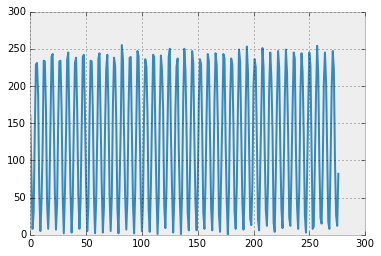

In [20]:
fila = a[150,:] #escogemos todas las columnas para la fila con índice 150 (corte de la imagen)
plt.plot(fila)

### Ejercicio 3

Vamos a ver una aplicación de la microscopía de fluorescencia en la que se trabaja con imágenes. Más concretamente veremos cómo la autofluorescencia de ciertos tejidos permite detectar el cáncer.

La autofluorescencia es la emisión propia de los tejidos biológicos al ser excitados por radiación con una longitud de onda apropiada. Es decir, en este caso no *marcamos* los tejidos de interés con ningún fluoróforo externo, sino que aprovechamos su emisión natural. Varios trabajos han estudiado las diferencias en la autofluorescencia entre tejidos sanos y tejidos con cáncer. En este apartado vamos a centrarnos en los resultados de Zellweger *et al.* (Ref) en 2001 donde mostraban diferencias en el espectro de autofluorescencia en broncoscopias. Concretamente observaron que al ser excitados con luz UV, la emisión fluorescente de tejidos tumorales en verde era mucho menor que la correspondiente a tejidos sanos, mientras que para longitudes de onda correspondientes al color rojo era mayor. Estas diferencias permiten discriminar pequeños tumores que por inspección directa pasan desapercibidos. 

3.1 Carga la imagen del fichero `cancer_1.jpg` en una variable denominada `autofluor`. Muestra su tamaño con la función `shape` y almacena el resultado en la variable `tam_imagen`. Finalmente, muestra la imagen en el notebook.

3.2 Separa las componentes RGB de la imagen en las variables `fluor_rojo`, `fluor_verde` y `fluor_azul`. Muestra cada una de ellas por separado en una imagen distinta. Para ello, generar antes de representar cada variable una figura distinta para cada caso: `figrojo`, `figverde`y `figazul`.

3.3 Localizar la posición (fila y columna) del tumor cancerígeno mediante el cálculo de la posición del máximo en la imagen del canal rojo y de los índices correspondientes. Almacena en la variable `maxfila` el valor de la fila que se corresponde con dicho máximo y en la variable `maxcol` el valor de la columna.

Nota: Para calcular los índices no basta con la función `np.argmax`. Es necesario utilizar la función `unravel_index`. Consultar la ayuda de esta función para ver cómo se utiliza.